# Using NLP methods, to do supervised and unsupervised learning on text data.

In [4]:

import requests ## THIS SENDS OUT REQUESTS TO THE WEBSITES
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np
import math
import os
import warnings
warnings.filterwarnings('ignore')
os.getcwd()
from collections import Counter ## this is a counting tool 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Scrapes transcript data 
def url_to_transcript(url):
    '''Returns song data specifically from https://scrapsfromtheloft.com'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")

    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text



# URLs of transcripts
urls = ['https://scrapsfromtheloft.com/2019/06/16/jo-koy-live-from-seattle-transcript/',
'https://scrapsfromtheloft.com/2019/04/30/robin-williams-weapons-of-self-destruction-transcript/',
'https://scrapsfromtheloft.com/2019/04/01/in-conversation-with-jerry-seinfeld/',
'https://scrapsfromtheloft.com/2019/03/18/sicko-2007-transcript/',
'https://scrapsfromtheloft.com/2018/08/17/bill-cosby-fall-of-an-american-icon-bbc-documentary/',
'https://scrapsfromtheloft.com/2017/09/30/living-proof/']

#Speaker names
speakers= ['Jo', 'Robin', 'Jerry', 'Michael', 'Thandie', 'Christopher']

In [5]:
# Actually request transcripts 
# (takes a few minutes to run)
lyrics1 = [url_to_transcript(u) for u in urls]


https://scrapsfromtheloft.com/2019/06/16/jo-koy-live-from-seattle-transcript/
https://scrapsfromtheloft.com/2019/04/30/robin-williams-weapons-of-self-destruction-transcript/
https://scrapsfromtheloft.com/2019/04/01/in-conversation-with-jerry-seinfeld/
https://scrapsfromtheloft.com/2019/03/18/sicko-2007-transcript/
https://scrapsfromtheloft.com/2018/08/17/bill-cosby-fall-of-an-american-icon-bbc-documentary/
https://scrapsfromtheloft.com/2017/09/30/living-proof/


In [7]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2019/06/16/jo-koy-live-from-seattle-transcript/


ConnectionError: HTTPSConnectionPool(host='scrapsfromtheloft.com', port=443): Max retries exceeded with url: /2019/04/30/robin-williams-weapons-of-self-destruction-transcript/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000231CF4B4240>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
# # Pickle files for later use

# # Make a new directory to hold the text files
#!mkdir transcripts

for i, c in enumerate(speakers):
    
    with open("transcripts" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)##pickle method can quickly save/load files into memory

In [9]:
# Load pickled files
data = {}
for i, c in enumerate(speakers):
    with open("transcripts" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [10]:
type(dict)

type

In [11]:
# Let's take a look at our data again
next(iter(data.keys()))

'Jo'

In [12]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Yo\nFinally here\nYou know I’m finally here\nFinally here\nYou know I’m finally here\nI hear these people talking about\nWhere I been I been on tour trying to work it out\nThey talking, like “Man, you finally made it, dawg”\nShit, I’m working on copping\nMy second house I remember back when\nNo one wanted to listen\nKind of funny who done came and gone\nBut I’m still here\nAnd I ain’t going nowhere\nNah, it’s my time, homey\nThis where I belong\nTruth is, I’m a savage…',
 'I’m home, you guys. [chuckling] Look at the diversity in this room. Every color. [cheers and applause] That’s what I love about Seattle. There’s, like, every color just mixed with everybody else. [audience laughing] Good shit. We’ve got Latinos out here. [cheering] Somehow you guys swam up. “Just keep going! I swear to God, mijo. Keep going!”',
 'When I first moved out here… Like, when I was living out here, this is where the Indian casinos started opening. Like Muckleshoot. Remember that? Is that still around? – [

In [13]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [14]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [15]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcripts']
data_df = data_df.sort_index()
data_df

,transcripts
Christopher,"Instead of marveling at the number of books, articles, and documentaries he produced, some of the author’s friends muttered about the quantity of ..."
Jerry,The Empire Interview “I had a good ride with the TV series. I got to enjoy big-time show business. But what I love is just sitting with a notepad....
Jo,Yo\nFinally here\nYou know I’m finally here\nFinally here\nYou know I’m finally here\nI hear these people talking about\nWhere I been I been on to...
Michael,"Sicko is not about the 47 million Americans who don’t have health insurance, it’s about some of the 250 million who have/had health insurance and ..."
Robin,"In this comedy special taped at DAR Constitution Hall, his first solo special on the network in seven years, Williams covers such topics as global..."
Thandie,"[Reporters] Nicole, good evening. The first of four days of pre-trial motion hearings.\nThe prosecution wants to call about a dozen women at trial..."


In [16]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [17]:

# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcripts.apply(round1))
data_clean

,transcripts
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the author’s friends muttered about the quantity of boo...
Jerry,the empire interview “i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bei...
Jo,yo\nfinally here\nyou know i’m finally here\nfinally here\nyou know i’m finally here\ni hear these people talking about\nwhere i been i been on to...
Michael,sicko is not about the million americans who don’t have health insurance it’s about some of the million who havehad health insurance and in spit...
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...
Thandie,nicole good evening the first of four days of pretrial motion hearings\nthe prosecution wants to call about a dozen women at trial\nthey also all...


In [18]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [19]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcripts.apply(round2))
data_clean

,transcripts
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...
Jerry,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...
Jo,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...
Michael,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...
Thandie,nicole good evening the first of four days of pretrial motion hearingsthe prosecution wants to call about a dozen women at trialthey also allege ...


In [20]:
# Let's add the comedians' full names as well
full_names = ['Christopher', 'Jerry', 'Jo', 'Michael', 'Robin', 'Thandie']

data_clean['full_name'] = full_names
data_clean

,transcripts,full_name
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...,Christopher
Jerry,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...,Jerry
Jo,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...,Jo
Michael,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...,Michael
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...,Robin
Thandie,nicole good evening the first of four days of pretrial motion hearingsthe prosecution wants to call about a dozen women at trialthey also allege ...,Thandie


In [21]:
data=data_clean

In [22]:
data=data.reset_index()

In [23]:
data

,index,transcripts,full_name
0,Christopher,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...,Christopher
1,Jerry,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...,Jerry
2,Jo,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...,Jo
3,Michael,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...,Michael
4,Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...,Robin
5,Thandie,nicole good evening the first of four days of pretrial motion hearingsthe prosecution wants to call about a dozen women at trialthey also allege ...,Thandie


In [24]:
df_genre=pd.DataFrame({'genre':['Documentary','Comedy','Comedy','Documentary','Comedy','Documentary']})

wholeSong_df=data.join(df_genre)

In [25]:
wholeSong_df=wholeSong_df.drop(['index'],axis=1)

In [95]:
wholeSong_df.head()

,transcripts,full_name,genre
0,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...,Christopher,Documentary
1,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...,Jerry,Comedy
2,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...,Jo,Comedy
3,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...,Michael,Documentary
4,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...,Robin,Comedy


In [27]:
import spacy ## spacy is the natural language processing module.
nlp = spacy.load('en_core_web_lg') ## load the english language dictionary, spacy has other languages also.

In [28]:
christoper = nlp(wholeSong_df['transcripts'][0])## upload individual articles onto spacy
jerry = nlp(wholeSong_df['transcripts'][1])
jo = nlp(wholeSong_df['transcripts'][2])
michael = nlp(wholeSong_df['transcripts'][3])
robin = nlp(wholeSong_df['transcripts'][4])
thandie = nlp(wholeSong_df['transcripts'][5])

In [29]:

# Group into sentences.
christoper_sents = [[sent, "christoper"] for sent in christoper.sents]## deriving sentences from each aricle
jerry_sents = [[sent,  "jerry"] for sent in jerry.sents]
jo_sents = [[sent, "jo"] for sent in jo.sents]
michael_sents = [[sent, "michael"] for sent in michael.sents]
robin_sents = [[sent, "robin"] for sent in robin.sents]
thandie_sents = [[sent, "thandie"] for sent in thandie.sents]


# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(christoper_sents + jerry_sents + jo_sents + michael_sents+robin_sents+thandie_sents)

In [30]:

sentences.head()

,0,1
0,"(instead, of, marveling, at, the, number, of, books, articles, and, documentaries, he, produced, some, of, the, authors, friends, muttered, about,...",christoper
1,"(and, then, it, was, good, to, read, that, decaffein­ated, coffee, beans, were, actually, higher, in, cholesterol, than, the, real, thing, but, th...",christoper
2,"(i, learned, that, in, the, breezy, words, of, my, hometown, rag, the, washington, post, drinking, a, glass, or, two, of, wine, beer, or, any, oth...",christoper
3,(yeah),christoper
4,"(that, s, right)",christoper


# Breaking down each article into many sentences to predict the outcome for each sentence.

In [31]:
christoper_sents

[[instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booze he drank now medical science backs his longheld belief that booze is a subtle weapon plus hitchs tips on drinking right by christopher hitchens my heart soared like a hawk when i read the recent study which recommended eating at least a clove of garlic a day appar­ent­ly this treatment along with plen­ty of onions would toughen up my prostate gland i had been vastly encouraged already by the news that tobacco smoking en­hanced shortterm memory and helped to ward off the onset of alz­heimers disease,
  'christoper'],
 [and then it was good to read that decaffein­ated coffee beans were actually higher in cholesterol than the real thing but the very best news was saved for januarys edition of the new england journal of medicine from there,
  'christoper'],
 [i learned that in the breezy words of my hometown rag the washington post drinking a

In [32]:
# Utility function to create a list of the 200 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_  ## take each word and break it down to lemma form, for example sing, singer, singing, sings all
                #convert to the word 'sing'
                for token in text  
                if not token.is_punct ## this gets rid of punctuations.
                and not token.is_stop]## stopwords are all the super common words like is and the there where here my 
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(200)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

In [33]:
# Set up the bags.
christoper_words = bag_of_words(christoper)
jerry_words = bag_of_words(jerry)
jo_words = bag_of_words(jo)
michael_words = bag_of_words(michael)
robin_words = bag_of_words(robin)
thandie_words = bag_of_words(thandie)

# Combine bags to create a set of unique words.
common_words = set(christoper_words + jerry_words + jo_words + michael_words + robin_words+ thandie_words)

In [34]:
word_counts=bow_features(sentences, common_words)

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950
Processing row 2000
Processing row 2050
Processing row 2100
Processing row 2150
Processing row 2200
Processing row 2250
Processing row 2300
Processing row 2350
Processing row 2400
Processing row 2450
Processing row 2500
Pro

In [35]:
word_counts['genre']=''
word_counts.loc[word_counts['text_source'].isin(['christoper','thandie','michael']),'genre_num']=1
word_counts.loc[word_counts['text_source'].isin(['jerry','jo','robin']),'genre_num']=0
                                                
                                                
                                                

In [36]:
word_counts['genre_num'].value_counts()

0.0    2226
1.0    1049
Name: genre_num, dtype: int64

In [37]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

In [38]:
from sklearn.model_selection import train_test_split
Y_bow = word_counts['genre_num']
X_bow = np.array(word_counts.drop(['text_sentence','text_source','genre'], 1))

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, 
                                                    Y_bow,
                                                    test_size=0.3,
                                                    random_state=99)

In [39]:
models = []
results = []
names = []
print('\t BOWs Accuracy\n\t score\t  std')

models.append(('NB', GaussianNB()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('LR', LogisticRegression()))

#models.append(('SVM', SVC(kernel='linear')))

models.append(('RF', RandomForestClassifier()))

models.append(('DT', DecisionTreeClassifier()))

models.append(('GB', GradientBoostingClassifier()))
models.append(('LRTuned', LogisticRegression(C=10,penalty= 'l2')))

for name, model in models:
    kfold = model_selection.KFold(n_splits = 5, random_state = 99)
    cv_results = model_selection.cross_val_score(model, X_train_bow, y_train_bow,
                                                cv = 5, 
                                                 scoring = 'accuracy')
   

    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

	 BOWs Accuracy
	 score	  std
NB:	0.9952 (0.0032)
KNN:	0.9149 (0.0161)
LR:	1.0000 (0.0000)
RF:	0.9974 (0.0025)
DT:	1.0000 (0.0000)
GB:	1.0000 (0.0000)
LRTuned:	1.0000 (0.0000)


# Bag of words method yields a very high accuracy in predicting genre.

In [42]:
#Using clustering methods on text data
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans,MiniBatchKMeans,MeanShift
from sklearn.cluster import SpectralClustering,AffinityPropagation
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import normalize

In [43]:

#function to determine K
def kClusters(X):
    squaredSums = []
    K = range(1,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel = kmeanModel.fit(X)
        squaredSums.append(kmeanModel.inertia_)

    # Plot the elbow
    plt.plot(K, squaredSums, 'bx-')
    plt.xlabel('k')
    plt.ylabel('squaredSums')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [44]:
#Find the clusters and plot them
from sklearn.decomposition import TruncatedSVD## a form of PCA for NLP
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA

def clusterModels(X,y,k):
    fig, ax = plt.subplots(1,4, figsize=(20,6))
    models = []
    names = []
    plt_num = []

   
    '''# I have to normalize the data to get this to plot
    I first tried PCA but then used SVD and also reduced 
    the features one third'''

    # Normalize the data.
    svd = TruncatedSVD(75)#Number of features: 756
    lsa = make_pipeline(svd, Normalizer(copy=False))
    
    # Run SVD on the training data, then project the training data.
    X_lsa = lsa.fit_transform(X)
    
    bandwidth = estimate_bandwidth(X_lsa, quantile=0.2, n_samples=50)

    models.append((0,'KMeans', KMeans(n_clusters=k, init='k-means++')))
    models.append((1,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
    models.append((2,'Spectral', SpectralClustering(n_clusters=k)))
    models.append((3,'Affinity', AffinityPropagation()))

    for plt_num, name, model in models:  
        names.append(name)
        model.fit(X_lsa)
        labels = model.labels_

        ax[plt_num].set_title(name)
        ax[plt_num].scatter(X_lsa[:, 0], X_lsa[:, 1], c=labels)
        print(name)
        print(pd.crosstab(y, labels),'\n\n')

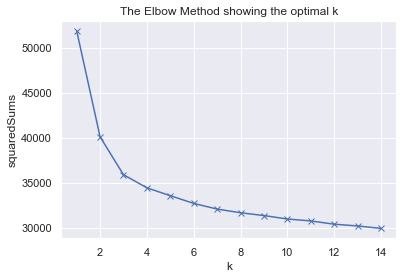

In [45]:
kClusters(X_train_bow)

# SSD drops significantly from 0 to 2. 2 might be a good number of clusters. 

KMeans
col_0        0    1
genre_num          
0.0        549  994
1.0        259  490 


MeanShift
col_0         0   1  2  3
genre_num                
0.0        1525  13  4  1
1.0         749   0  0  0 


Spectral
col_0         0    1
genre_num           
0.0        1016  527
1.0         508  241 


Affinity
col_0      0    1    2    3    4    5    6    7    8    9   ...   199  200  \
genre_num                                                   ...              
0.0          2    2    0   19   21    0   19    4    1   94 ...    17    9   
1.0          0    0    7   12    1   23   20    0    0    2 ...     1   11   

col_0      201  202  203  204  205  206  207  208  
genre_num                                          
0.0         17    0    2    8    5    3   18   10  
1.0          2   13    0    2    5    6    1    5  

[2 rows x 209 columns] 




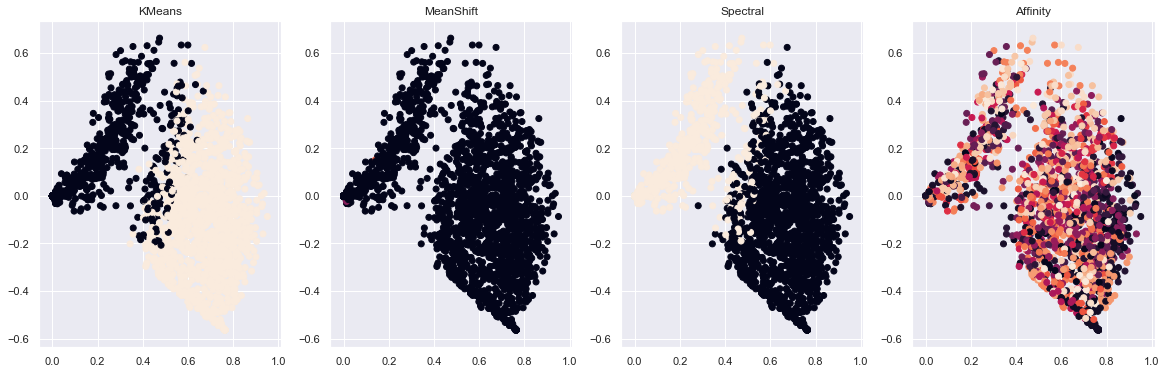

In [46]:
bowUnsupModels = clusterModels(X_train_bow,y_train_bow,2)

KMeans
col_0        0    1
genre_num          
0.0        237  446
1.0        123  177 


MeanShift
col_0        0
genre_num     
0.0        683
1.0        300 


Spectral
col_0        0    1
genre_num          
0.0        457  226
1.0        183  117 


Affinity
col_0      0   1   2   3   4   5   6   7   8   9  ...  72  73  74  75  76  77  \
genre_num                                         ...                           
0.0         1   9   7  16   1   1  20   5  13   9 ...   1  23   0   1   7   3   
1.0         0  11   0   2   0   6   2   1   8   0 ...   0   5  15   0   0   0   

col_0      78  79  80  81  
genre_num                  
0.0         5  14   4   4  
1.0         1  11   1   0  

[2 rows x 82 columns] 




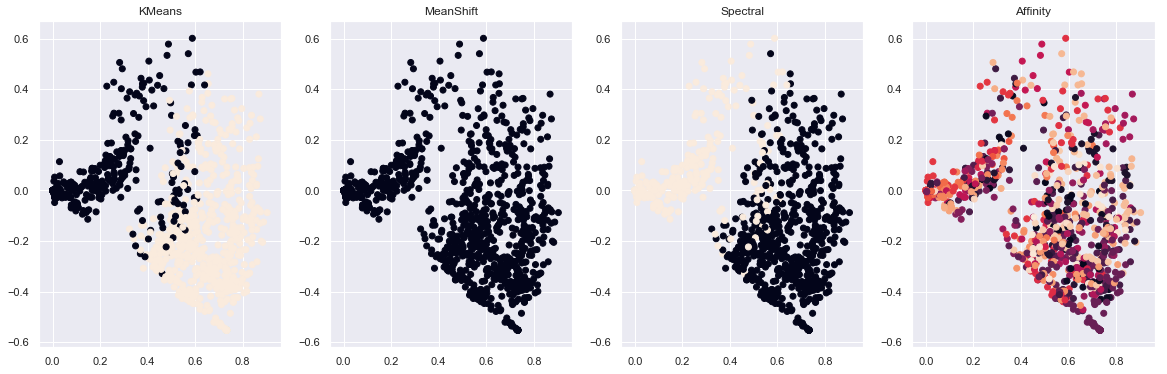

In [47]:
bowUnsupModelsTest = clusterModels(X_test_bow,y_test_bow,2)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

y1 = word_counts['genre_num']
X1 = word_counts['text_sentence']


X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X1,y1, 
                                                    test_size = 0.25,random_state=99)

In [70]:
word_counts[['genre_num','text_sentence']].to_csv('doc_vs_comedy.txt')

In [73]:
doc=pd.read_csv('doc_vs_comedy.txt')

In [77]:
X1=doc['text_sentence']
y1=doc['genre_num']

In [79]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X1,y1, 
                                                    test_size = 0.25,random_state=99)

In [80]:
vectorizer = TfidfVectorizer(stop_words="english", 
                             analyzer='word', 
                             max_df=0.5, #0.95
                             min_df=5, #0.01
                             max_features=None)

In [81]:
X_traincv = vectorizer.fit_transform(X_train_tf)
features_names = vectorizer.get_feature_names()
print('Number of features: ',len(features_names))

Number of features:  622


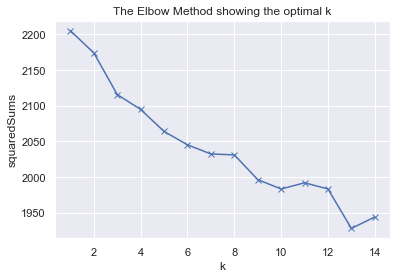

In [82]:
#TFIDF 
kClusters(X_traincv)

KMeans
col_0         0   1
genre_num          
0.0        1599  59
1.0         786  12 


MeanShift
col_0         0
genre_num      
0.0        1658
1.0         798 


Spectral
col_0         0   1
genre_num          
0.0        1599  59
1.0         786  12 


Affinity
col_0      0    1    2    3    4    5    6    7    8    9   ...   140  141  \
genre_num                                                   ...              
0.0          8   23    2    7   17    9   23   15    1    3 ...    13    4   
1.0          6    7    1    5    7    0    5   18    1    4 ...     5    1   

col_0      142  143  144  145  146  147  148  149  
genre_num                                          
0.0          3    1    4    2   12   16    5    1  
1.0          4    1    4    5    0    6    4    4  

[2 rows x 150 columns] 




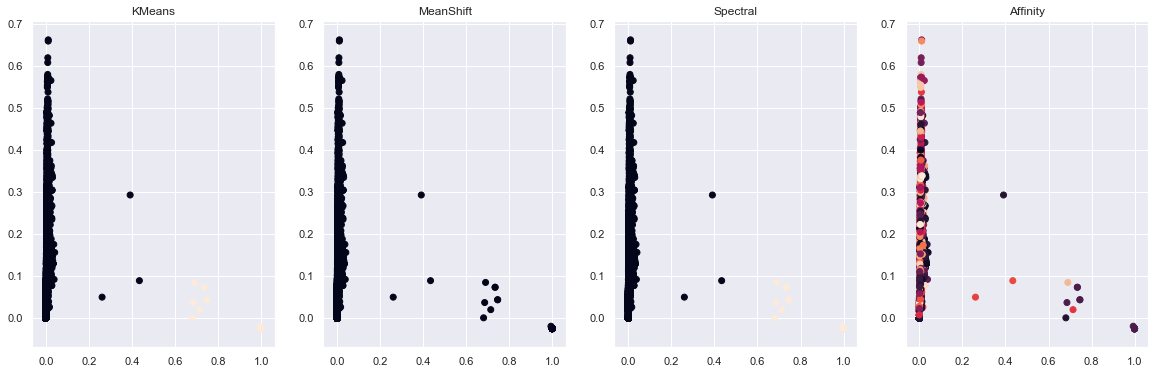

In [83]:
tfUnsupModels = clusterModels(X_traincv,y_train_tf,2)

In [85]:
X_testcv = vectorizer.transform(X_test_tf)

KMeans
col_0       0    1
genre_num         
0.0        12  556
1.0        13  238 


MeanShift
col_0        0
genre_num     
0.0        568
1.0        251 


Spectral
col_0        0   1
genre_num         
0.0        556  12
1.0        239  12 


Affinity
col_0      0   1   2   3   4   5   6   7   8   9  ...  70  71  72  73  74  75  \
genre_num                                         ...                           
0.0         3   6   7   3   2   9   7   5   2   4 ...   5   1   4   5   5   3   
1.0         1   1   1   2   4   0   5   1   6   3 ...   3   8   1   1   2   3   

col_0      76  77  78  79  
genre_num                  
0.0         5   2  12  10  
1.0         0   7   0   5  

[2 rows x 80 columns] 




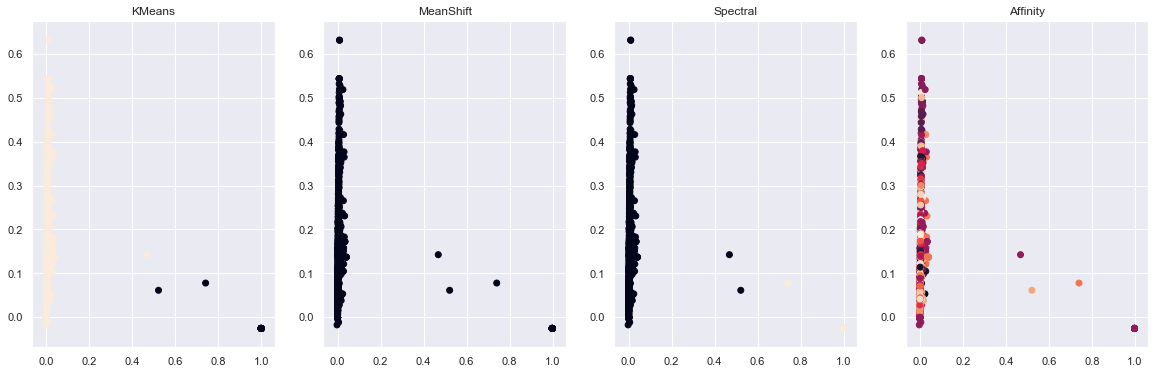

In [86]:
tfUnsupModelsTest = clusterModels(X_testcv,y_test_tf,2)

In [96]:
wholeSong_df_clean=wholeSong_df

In [97]:
wholeSong_df_clean.genre.value_counts()

Documentary    3
Comedy         3
Name: genre, dtype: int64

In [99]:
wholeSong_df_clean.head()

,transcripts,full_name,genre
0,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...,Christopher,Documentary
1,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...,Jerry,Comedy
2,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...,Jo,Comedy
3,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...,Michael,Documentary
4,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...,Robin,Comedy


In [100]:
y2 = wholeSong_df_clean['genre']
X2 = wholeSong_df_clean.transcripts
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, 
                                                        test_size = 0.25, 
                                                         random_state=99)

# TFIDF feature creation on text data.

In [103]:
vectorizer2 = CountVectorizer(stop_words="english", 
                              analyzer='word',  
                              max_features=None)

In [104]:

X_train2cv = vectorizer2.fit_transform(X_train2)
feature_names2 = vectorizer.get_feature_names()
print('Number of features: ',len(feature_names2))
'''X_test_tf2 = tfidf2.transform(vectorTf)
X_test_tf2Df = pd.DataFrame(X_test_tf2.todense(), columns=features_names2)
X_test_tf2.shape'''

Number of features:  622


'X_test_tf2 = tfidf2.transform(vectorTf)\nX_test_tf2Df = pd.DataFrame(X_test_tf2.todense(), columns=features_names2)\nX_test_tf2.shape'

In [105]:
X_test2cv = vectorizer2.transform(X_test2)

In [106]:
#print(X_train2cv.shape,X_test2cv.shape)
print(X_traincv.shape, y_train2.shape, X_test2cv.shape, y_test2.shape)

(2456, 622) (4,) (2, 4128) (2,)


# Latent semantic analysis to reduce feature space. 

In [109]:
def svdReduction(Xtrain):    
    #Our SVD data reducer.  We are going to reduce the feature space from 750 to 75.
    svd= TruncatedSVD(75)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    # Run SVD on the training data, then project the training data.
    X_train_lsa = lsa.fit_transform(Xtrain)#xtrain

    # Calculate predicted values.
    y_pred = KMeans(n_clusters=2, random_state=99).fit_predict(X_train_lsa) 
    
    variance_explained=svd.explained_variance_ratio_
    total_variance = variance_explained.sum()
    print("Percent variance captured by all components:",total_variance*100)

    #Looking at what sorts of paragraphs our solution considers similar, for the first 10 identified topics
    lsa_component=pd.DataFrame(X_train_lsa,index=X_train2)
    for i in range(10):
        print('Component {}:'.format(i))
        print(lsa_component.loc[:,i].sort_values(ascending=False)[0:10][0])
    
    plt.hist(variance_explained, bins=50)
    plt.show()

In [110]:
tfSVD = svdReduction(X_train2cv)

Percent variance captured by all components: 99.99999999999926
Component 0:
0.9655035678121339
Component 1:
0.7187485458845668
Component 2:
0.7628532609499676
Component 3:
0.9225515476998629
Component 4:


KeyError: 'the label [4] is not in the [columns]'

# Topic modeling to figure out what are the most talked about topicsin the articles.

In [111]:

from sklearn.decomposition import LatentDirichletAllocation

In [114]:

vectorizer3 = CountVectorizer(stop_words="english", 
                              analyzer='word', 

                              max_features=None)

In [115]:

vec3= vectorizer3.fit_transform(wholeSong_df_clean['transcripts'])

In [116]:
LDA = LatentDirichletAllocation(n_components=2,random_state=99)

In [117]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(vec3)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=2, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=99, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [118]:
LDA.components_## these are the number of Topics picked

array([[0.50000466, 2.49996748, 2.49998695, ..., 1.49998729, 3.49998219,
        1.49998729],
       [2.49999534, 0.50003252, 0.50001305, ..., 0.50001271, 0.50001781,
        0.50001271]])

In [119]:

## find top 50 words
for index,topic in enumerate(LDA.components_):
    print(f'The top 50 words for topic number {index}')
    print([vectorizer3.get_feature_names()[i] for i in topic.argsort()[-50:]])
    print('\n')

The top 50 words for topic number 0
['america', 'hes', 'make', 'years', 'thing', 'black', 'work', 'care', 'didnt', 'way', 'thank', 'new', 'little', 'theyre', 'healthcare', 'kind', 'insurance', 'god', 'health', 'narrator', 'man', 'yes', 'say', 'really', 'time', 'theres', 'oh', 'good', 'gonna', 'want', 'went', 'fucking', 'think', 'did', 'come', 'yeah', 'right', 'youre', 'said', 'fuck', 'got', 'cosby', 'thats', 'people', 'just', 'know', 'im', 'dont', 'going', 'like']


The top 50 words for topic number 1
['chicken', 'talking', 'guy', 'little', 'stop', 'yeah', 'lot', 'day', 'goes', 'comedian', 'joseph', 'going', 'make', 'love', 'youre', 'theyre', 'good', 'didnt', 'doesnt', 'guys', 'funny', 'dad', 'come', 'school', 'theres', 'son', 'people', 'did', 'think', 'thing', 'god', 'time', 'oh', 'got', 'fucking', 'hes', 'gonna', 'right', 'want', 'fuck', 'empire', 'mom', 'thats', 'seinfeld', 'dont', 'know', 'shit', 'just', 'im', 'like']


